# Task 1

In [2]:
import pandas as pd
yearly = pd.read_csv("datasets/yearly_deaths_by_clinic.csv")
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [3]:
yearly.shape

(12, 4)

# Task 2

In [5]:
yearly["proportion_deaths"] = yearly["deaths"] / yearly["births"]

In [6]:
yearly1 = yearly[yearly.clinic == 'clinic 1']
yearly2 = yearly[yearly.clinic == 'clinic 2']

In [7]:
yearly1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


# Task 3

Text(0, 0.5, 'Proportion deaths')

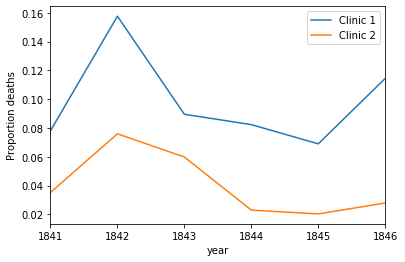

In [17]:
ax = yearly1.plot(x="year", y="proportion_deaths",
              label="Clinic 1")
yearly2.plot(x="year", y="proportion_deaths",
              label="Clinic 2", ax=ax)
ax.set_ylabel("Proportion deaths")

# Task 4

In [9]:
monthly = pd.read_csv("datasets/monthly_deaths.csv", parse_dates=["date"])

In [10]:
monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


In [11]:
monthly.shape

(98, 4)

# Task 5

Text(0, 0.5, 'Proportion deaths')

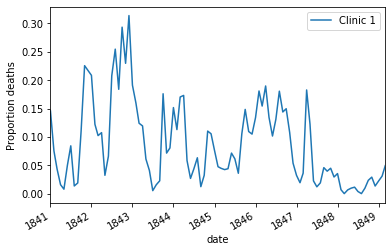

In [12]:
ax = monthly.plot(x="date", y="proportion_deaths",
              label="Clinic 1")
ax.set_ylabel("Proportion deaths")

# Task 6

In [13]:
before_washing = monthly[monthly["date"] < '1847']
after_washing = monthly[monthly["date"] >= '1847']

Text(0, 0.5, 'Proportion deaths')

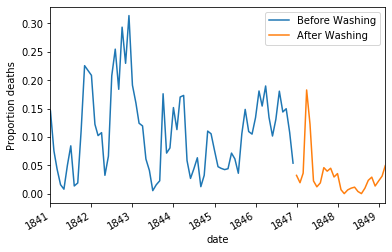

In [14]:
ax = before_washing.plot(x="date", y="proportion_deaths",
              label="Before Washing")
after_washing.plot(x="date", y="proportion_deaths",
              label="After Washing", ax=ax)
ax.set_ylabel("Proportion deaths")

# Task 7

In [15]:
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]

In [16]:
avg_reduce_in_death_prop = before_proportion.mean() - after_proportion.mean()
avg_reduce_in_death_prop

0.07519076642777145

# Task 8

In [30]:
boot_mean_diff = []
for _ in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    mean_diff = boot_before.mean() - boot_after.mean()
    boot_mean_diff.append(mean_diff)

In [41]:
pd.Series(boot_mean_diff).quantile([0.025, 0.975])

0.025    0.052636
0.975    0.096413
dtype: float64

# Task 9

In [46]:
print('''It's True,
    doctors should wash their hands.''')

It's True,
    doctors should wash their hands.
